#  Image Classsification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn import svm
import os
from skimage.transform import resize   # to resize the image
from skimage.io import imread          # to read image
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
os.listdir('/content/drive/MyDrive/data')

['cat', 'dog']

In [ ]:
len(os.listdir('/content/drive/MyDrive/data'))

2

In [ ]:
len(os.listdir('/content/drive/MyDrive/data/cat'))

85

In [ ]:
len(os.listdir('/content/drive/MyDrive/data/dog'))

85

In [ ]:
catpath=os.path.join('/content/drive/MyDrive/data','cat')
for img in os.listdir(catpath):
  print(img)

cat.84.jpg
cat.6.jpg
cat.10.jpg
cat.7.jpg
cat.80.jpg
cat.81.jpg
cat.9.jpg
cat.4.jpg
cat.83.jpg
cat.85.jpg
cat.2.jpg
cat.11.jpg
cat.79.jpg
cat.8.jpg
cat.3.jpg
cat.5.jpg
cat.13.jpg
cat.12.jpg
cat.82.jpg
cat.86.jpg
cat.38.jpg
cat.32.jpg
cat.35.jpg
cat.28.jpg
cat.24.jpg
cat.29.jpg
cat.40.jpg
cat.27.jpg
cat.42.jpg
cat.21.jpg
cat.34.jpg
cat.15.jpg
cat.30.jpg
cat.14.jpg
cat.23.jpg
cat.39.jpg
cat.44.jpg
cat.17.jpg
cat.33.jpg
cat.41.jpg
cat.19.jpg
cat.18.jpg
cat.22.jpg
cat.43.jpg
cat.26.jpg
cat.16.jpg
cat.36.jpg
cat.37.jpg
cat.25.jpg
cat.31.jpg
cat.20.jpg
cat.51.jpg
cat.56.jpg
cat.68.jpg
cat.75.jpg
cat.53.jpg
cat.62.jpg
cat.69.jpg
cat.61.jpg
cat.66.jpg
cat.49.jpg
cat.71.jpg
cat.70.jpg
cat.67.jpg
cat.65.jpg
cat.58.jpg
cat.74.jpg
cat.52.jpg
cat.64.jpg
cat.59.jpg
cat.50.jpg
cat.47.jpg
cat.54.jpg
cat.77.jpg
cat.76.jpg
cat.46.jpg
cat.57.jpg
cat.63.jpg
cat.45.jpg
cat.55.jpg
cat.48.jpg
cat.73.jpg
cat.60.jpg
cat.72.jpg
cat.78.jpg


In [ ]:
dogpath=os.path.join('/content/drive/MyDrive/data','dog')
for img1 in os.listdir(dogpath):
  print(img1)

dog.11.jpg
dog.9.jpg
dog.5.jpg
dog.15.jpg
dog.6.jpg
dog.7.jpg
dog.13.jpg
dog.14.jpg
dog.10.jpg
dog.4.jpg
dog.3.jpg
dog.1.jpg
dog.2.jpg
dog.12.jpg
dog.8.jpg
dog.27.jpg
dog.44.jpg
dog.26.jpg
dog.20.jpg
dog.43.jpg
dog.25.jpg
dog.22.jpg
dog.30.jpg
dog.33.jpg
dog.23.jpg
dog.36.jpg
dog.24.jpg
dog.35.jpg
dog.41.jpg
dog.17.jpg
dog.45.jpg
dog.31.jpg
dog.16.jpg
dog.29.jpg
dog.32.jpg
dog.37.jpg
dog.28.jpg
dog.42.jpg
dog.39.jpg
dog.21.jpg
dog.40.jpg
dog.34.jpg
dog.38.jpg
dog.18.jpg
dog.19.jpg
dog.59.jpg
dog.61.jpg
dog.66.jpg
dog.72.jpg
dog.53.jpg
dog.65.jpg
dog.63.jpg
dog.46.jpg
dog.57.jpg
dog.70.jpg
dog.58.jpg
dog.64.jpg
dog.49.jpg
dog.54.jpg
dog.67.jpg
dog.74.jpg
dog.69.jpg
dog.76.jpg
dog.48.jpg
dog.56.jpg
dog.75.jpg
dog.51.jpg
dog.73.jpg
dog.55.jpg
dog.68.jpg
dog.52.jpg
dog.47.jpg
dog.62.jpg
dog.60.jpg
dog.50.jpg
dog.71.jpg
dog.77.jpg
dog.83.jpg
dog.82.jpg
dog.84(1).jpg
dog.78.jpg
dog.80.jpg
dog.81.jpg
dog.84.jpg
dog.79.jpg


In [ ]:
flat_data_arr=[]            #
target_arr=[]               # target variable
categories=['cat','dog']
datadir='/content/drive/MyDrive/data'

In [ ]:
for i in categories:
  print('loading.........category :',i)            # i= cat,dog
  path=os.path.join(datadir,i)                   # '/content/drive/MyDrive/data/cat or dog'
  for img2 in os.listdir(path):
    img_array=imread(os.path.join(path,img2))       #'/content/drive/MyDrive/data/cat or dog/cat1 ...'
    img_resize=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resize.flatten())       # converting two dimensional image to one dimensional image
    target_arr.append(categories.index(i))          # converting  0=cat and 1=dog  and storing the index
  print('loaded category',i,'successfully')

loading.........category : cat
loaded category cat successfully
loading.........category : dog
loaded category dog successfully


In [ ]:
flat_data=np.array(flat_data_arr)
target_data=np.array(target_arr)
dataframe=pd.DataFrame(flat_data)         # dataframe
dataframe

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.466905,0.333572,0.186330,0.542189,0.408855,0.261614,0.517542,0.384209,0.236967,0.508233,...,0.220859,0.471927,0.342149,0.261940,0.453584,0.328521,0.243510,0.513943,0.394466,0.310141
1,0.860451,0.758490,0.801627,0.826451,0.724490,0.767627,0.819608,0.717647,0.760784,0.821209,...,0.194242,0.408954,0.121810,0.201190,0.414529,0.110725,0.204765,0.433752,0.117529,0.223412
2,0.107508,0.123194,0.158488,0.064561,0.080247,0.122603,0.085195,0.098749,0.147941,0.147313,...,0.004857,0.752941,0.751569,0.011765,0.723765,0.713529,0.017606,0.671560,0.652379,0.009124
3,0.106471,0.039804,0.000000,0.117647,0.047059,0.002157,0.128431,0.050000,0.000000,0.141569,...,0.263582,0.172529,0.250320,0.239575,0.122641,0.188627,0.177097,0.085046,0.124797,0.117403
4,0.301961,0.294118,0.211765,0.304667,0.296824,0.214471,0.305882,0.298039,0.215686,0.305882,...,0.525650,0.591059,0.575373,0.528314,0.590184,0.574497,0.527438,0.588235,0.572549,0.525490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.342458,0.342458,0.350301,0.325438,0.325438,0.333281,0.360444,0.360444,0.368288,0.366318,...,0.507163,0.568793,0.553107,0.509969,0.539216,0.520105,0.476471,0.537743,0.514379,0.467320
166,0.166027,0.150341,0.142456,0.173771,0.158085,0.154438,0.223488,0.207802,0.209332,0.253268,...,0.189575,0.670079,0.661372,0.259543,0.892576,0.910563,0.305608,0.903564,0.925316,0.240819
167,0.567307,0.575150,0.555542,0.562392,0.570235,0.550627,0.554902,0.561765,0.542157,0.549412,...,0.619477,0.605359,0.621046,0.624967,0.620614,0.636301,0.640222,0.632431,0.648118,0.652039
168,0.151527,0.014272,0.000000,0.161059,0.023804,0.000275,0.159020,0.021765,0.000000,0.146431,...,0.056266,0.045686,0.026810,0.036223,0.089328,0.023255,0.054353,0.103618,0.036952,0.068324


In [ ]:
dataframe.shape

(170, 67500)

In [ ]:
dataframe['Target']=target_data                    # adding target data to dataframe
dataframe

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.466905,0.333572,0.186330,0.542189,0.408855,0.261614,0.517542,0.384209,0.236967,0.508233,...,0.471927,0.342149,0.261940,0.453584,0.328521,0.243510,0.513943,0.394466,0.310141,0
1,0.860451,0.758490,0.801627,0.826451,0.724490,0.767627,0.819608,0.717647,0.760784,0.821209,...,0.408954,0.121810,0.201190,0.414529,0.110725,0.204765,0.433752,0.117529,0.223412,0
2,0.107508,0.123194,0.158488,0.064561,0.080247,0.122603,0.085195,0.098749,0.147941,0.147313,...,0.752941,0.751569,0.011765,0.723765,0.713529,0.017606,0.671560,0.652379,0.009124,0
3,0.106471,0.039804,0.000000,0.117647,0.047059,0.002157,0.128431,0.050000,0.000000,0.141569,...,0.172529,0.250320,0.239575,0.122641,0.188627,0.177097,0.085046,0.124797,0.117403,0
4,0.301961,0.294118,0.211765,0.304667,0.296824,0.214471,0.305882,0.298039,0.215686,0.305882,...,0.591059,0.575373,0.528314,0.590184,0.574497,0.527438,0.588235,0.572549,0.525490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.342458,0.342458,0.350301,0.325438,0.325438,0.333281,0.360444,0.360444,0.368288,0.366318,...,0.568793,0.553107,0.509969,0.539216,0.520105,0.476471,0.537743,0.514379,0.467320,1
166,0.166027,0.150341,0.142456,0.173771,0.158085,0.154438,0.223488,0.207802,0.209332,0.253268,...,0.670079,0.661372,0.259543,0.892576,0.910563,0.305608,0.903564,0.925316,0.240819,1
167,0.567307,0.575150,0.555542,0.562392,0.570235,0.550627,0.554902,0.561765,0.542157,0.549412,...,0.605359,0.621046,0.624967,0.620614,0.636301,0.640222,0.632431,0.648118,0.652039,1
168,0.151527,0.014272,0.000000,0.161059,0.023804,0.000275,0.159020,0.021765,0.000000,0.146431,...,0.045686,0.026810,0.036223,0.089328,0.023255,0.054353,0.103618,0.036952,0.068324,1


In [ ]:
x=dataframe.iloc[:,:-1]
y=dataframe.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=5)

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

Classification Report
               precision    recall  f1-score   support

           0       0.65      0.41      0.50        27
           1       0.53      0.75      0.62        24

    accuracy                           0.57        51
   macro avg       0.59      0.58      0.56        51
weighted avg       0.59      0.57      0.56        51

Confusion Matrix Display <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f56b1094590>


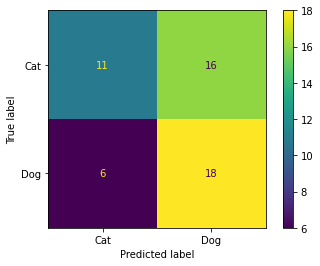

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print('Classification Report\n',classification_report(y_test,y_pred))
labels=['Cat','Dog']
print('Confusion Matrix Display',ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=labels))

In [ ]:
path='/content/drive/MyDrive/Cat.jfif'
img=imread(path)
img=resize(img,(150,150,3)).flatten().reshape(1,-1)
model.predict(img)

array([1])

In [ ]:
path='/content/drive/MyDrive/Dog.jfif'
img=imread(path)
img=resize(img,(150,150,3)).flatten().reshape(1,-1)
model.predict(img)

array([1])